In [32]:
from netCDF4 import Dataset
import pandas as pd
from cartoplot import cartoplot
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy
import os
import datetime
import tqdm
from ll_xy import lonlat_to_xy
import pickle

# ATBD DOCUMENT
# https://docs.google.com/document/d/1USfdqsDzEHKh2TxMlh3_r3Xbkjeg2NBMDaRsQtngPck/edit?usp=sharing

In [33]:
sic_dir = '/home/robbie/uit_mnt/Data/romal7177/ResearchData/IFT/EarthObservation/SatelliteAltimetry/OSISAF Sea Ice Concentration'
year=2003
f = 'ice_conc_nh_ease2-250_cdr-v2p0_200303101200.nc'

d = Dataset(f'{sic_dir}/{year}/{f}')
lons = np.array(d['lon'])
lats = np.array(d['lat'])
xgrid,ygrid=lonlat_to_xy(lons,lats,hemisphere='n')

In [34]:

aust_lon, aust_lat = 24.6,79.8
aust_x,aust_y = lonlat_to_xy(np.array(aust_lon),np.array(aust_lat),hemisphere='n')

distances_to_austfonna = np.sqrt((xgrid-aust_x)**2+(ygrid-aust_y)**2)

In [35]:

sic = np.array(d['ice_conc'])[0]/100
sic[sic<0]=np.nan

dist_thresh=100_000
sic_nearby = sic.copy()
sic_nearby[distances_to_austfonna>dist_thresh]=np.nan

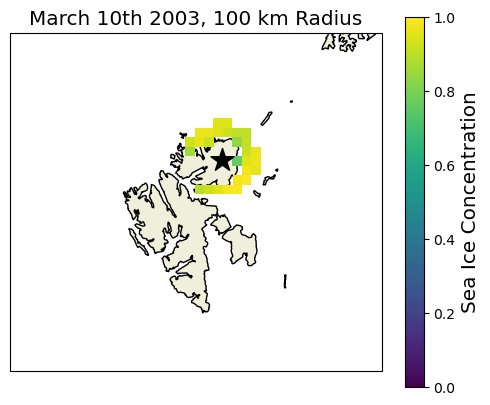

In [36]:
fig = plt.figure(figsize=(6,6))
proj = ccrs.NorthPolarStereo()
ax = plt.axes(projection=proj)

ax.set_extent([-180, 180,90, 65], ccrs.PlateCarree())

ax.set_extent([-0.09e+06, 0.9e6, -1.6e6, -0.7e6], crs=ccrs.NorthPolarStereo()) 

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

cont = ax.pcolormesh(lons,
                      lats,
                  sic_nearby,
                     vmin=0,vmax=1,
                  transform=ccrs.PlateCarree())

ax.set_title('March 10th 2003, 100 km Radius',fontsize='x-large')
ax.scatter(24.6,79.8,transform=ccrs.PlateCarree(),marker='*',s=302,c='k')

cb = fig.colorbar(cont,shrink=0.8)
cb.set_label('Sea Ice Concentration',fontsize='x-large')
# fig.savefig('Ice_Edge_Jan25.png',dpi=400,bbox_inches='tight')

In [50]:
flade_lat,flade_lon = 81.45,-15.0
flade_x,flade_y = lonlat_to_xy(np.array(flade_lon),np.array(flade_lat),hemisphere='n')

distances_to_flade = np.sqrt((xgrid-flade_x)**2+(ygrid-flade_y)**2)


sic = np.array(d['ice_conc'])[0]/100
sic[sic<0]=np.nan

dist_thresh=200_000
thresh_code = 200
sic_nearby = sic.copy()
sic_nearby[distances_to_flade>dist_thresh]=np.nan

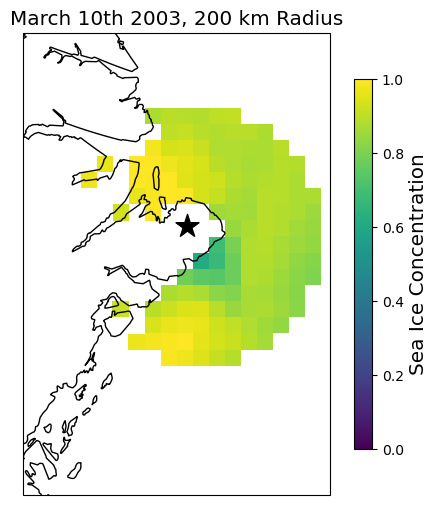

In [51]:
fig = plt.figure(figsize=(6,6))
proj = ccrs.NorthPolarStereo()
ax = plt.axes(projection=proj)

ax.set_extent([-22, -2,84, 78], ccrs.PlateCarree())

# ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
ax.add_feature(cartopy.feature.COASTLINE,)

cont = ax.pcolormesh(lons,
                      lats,
                  sic_nearby[:-1,:-1],
                     vmin=0,vmax=1,
                  transform=ccrs.PlateCarree())

ax.set_title(f'March 10th 2003, {thresh_code} km Radius',fontsize='x-large')
ax.scatter(flade_lon,flade_lat,transform=ccrs.PlateCarree(),marker='*',s=302,c='k')

cb = fig.colorbar(cont,shrink=0.8)
cb.set_label('Sea Ice Concentration',fontsize='x-large')
# fig.savefig('Ice_Edge_Jan25.png',dpi=400,bbox_inches='tight')